In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
import cftime 
import psutil
import xesmf as xe

In [3]:
from src.multi_model_large_ensemble import MultiModelLargeEnsemble

## Global loading

In [30]:
mmle = MultiModelLargeEnsemble(['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR'], 'tas', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [31]:
mmle.compute_x(x_type='quantile_return', load=True, name='default_quantile_return_10yr')

Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/default_quantile_return_10yr/MIROC6.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/default_quantile_return_10yr/cesm_lens.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/default_quantile_return_10yr/CanESM5.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/default_quantile_return_10yr/MPI-ESM1-2-LR.zarr


In [37]:
mmle.x.load()

<xarray.DataArray 'tas' (model: 4, member_id: 50, time: 181, lat: 71, lon: 144)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * model      (model) <U13 'MIROC6' 'cesm_lens' 'CanESM5' 'MPI-ESM1-2-LR'
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
  * lat        (lat) float64 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    q_values   (model, lat, lon) float64 267.6 267.4 267.3 ... 273.7 273.7 273.7
    quantile   (model) float64 0.9997 0.9997 0.9997 0.9997

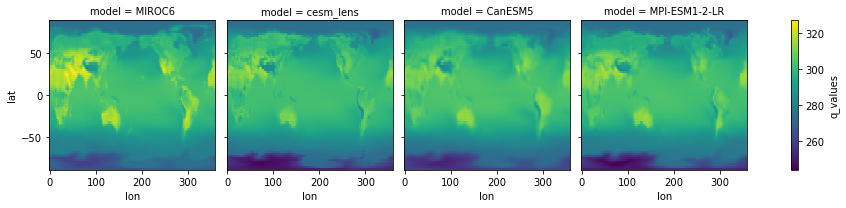

In [38]:
mmle.x.q_values.plot(col='model')

In [39]:
mmle.compute_LE()

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [40]:
mmle.results

<xarray.Dataset>
Dimensions:   (time: 181, lat: 71, lon: 144, model: 4)
Coordinates:
  * time      (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
  * lat       (lat) float64 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * model     (model) <U13 'MIROC6' 'cesm_lens' 'CanESM5' 'MPI-ESM1-2-LR'
    q_values  (model, lat, lon) float64 267.6 267.4 267.3 ... 273.7 273.7 273.7
    quantile  (model) float64 0.9997 0.9997 0.9997 0.9997
Data variables:
    M_LE      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    I_LE      (model, time, lat, lon) float64 nan nan nan nan ... nan nan nan
    Ibar_LE   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    T_LE      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [42]:
frac = mmle.results['M_LE'] / (mmle.results['M_LE'] + mmle.results['Ibar_LE'])

In [83]:
ref = mmle.x.sel(time=slice('1995', '2015')).mean(('member_id', 'time', 'model'))

In [84]:
S = mmle.x.mean(('member_id', 'model')) - ref

In [92]:
SNR = np.abs(S / np.sqrt(mmle.results['T_LE']))
SNR_ideal = np.abs(S / np.sqrt(mmle.results['Ibar_LE']))

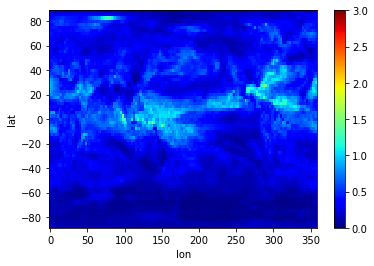

In [99]:
SNR.sel(time=slice('1995', '2015')).mean('time').plot(cmap='jet', vmin=0, vmax=3)

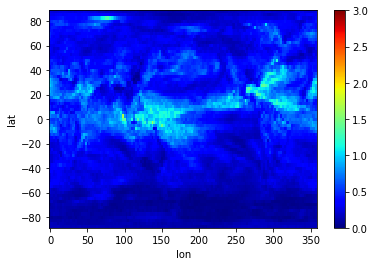

In [100]:
SNR_ideal.sel(time=slice('1995', '2015')).mean('time').plot(cmap='jet', vmin=0, vmax=3)

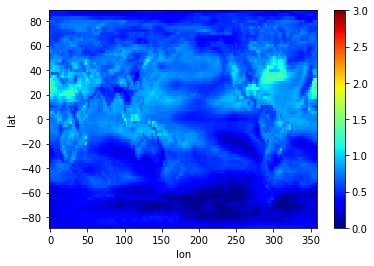

In [101]:
SNR.sel(time=slice('2015', '2025')).mean('time').plot(cmap='jet', vmin=0, vmax=3)

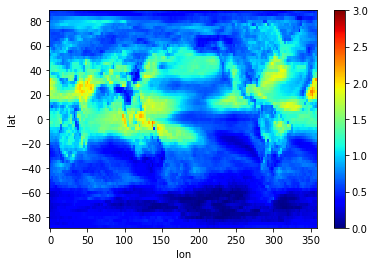

In [102]:
SNR_ideal.sel(time=slice('2015', '2025')).mean('time').plot(cmap='jet', vmin=0, vmax=3)

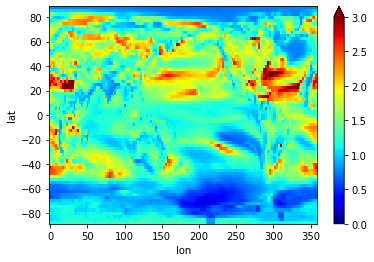

In [103]:
SNR.sel(time=slice('2050', '2059')).mean('time').plot(cmap='jet', vmin=0, vmax=3)

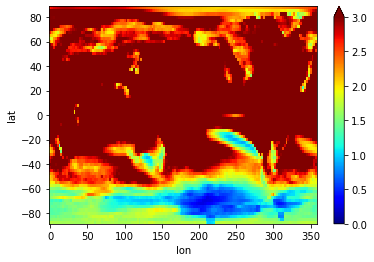

In [104]:
SNR_ideal.sel(time=slice('2050', '2059')).mean('time').plot(cmap='jet', vmin=0, vmax=3)

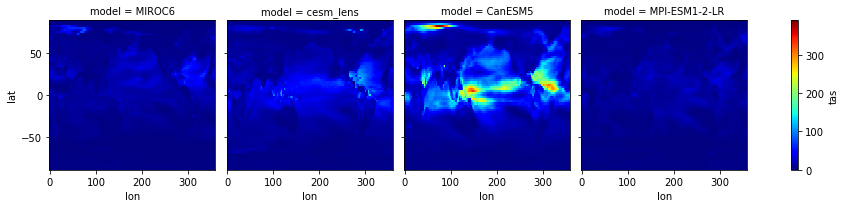

In [54]:
mmle.x.mean('member_id').sel(time=slice('2020', '2029')).mean('time').plot(col='model', cmap='jet')

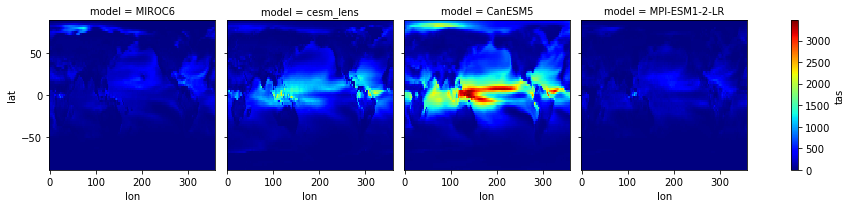

In [55]:
mmle.x.mean('member_id').sel(time=slice('2050', '2059')).mean('time').plot(col='model', cmap='jet')

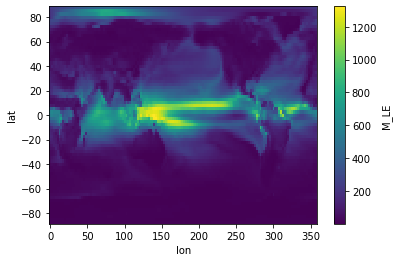

In [50]:
np.sqrt(mmle.results['M_LE']).sel(time=slice('2050', '2059')).mean('time').plot()

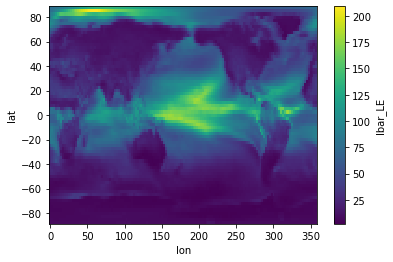

In [51]:
np.sqrt(mmle.results['Ibar_LE']).sel(time=slice('2050', '2059')).mean('time').plot()

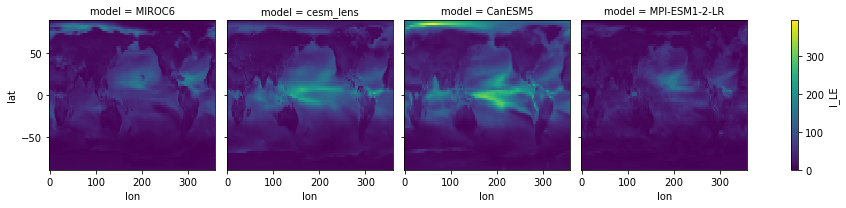

In [56]:
np.sqrt(mmle.results['I_LE']).sel(time=slice('2050', '2059')).mean('time').plot(col='model')

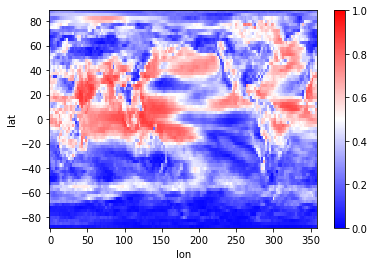

In [47]:
frac.sel(time=slice('2020', '2029')).mean('time').plot(vmin=0, vmax=1, cmap='bwr')

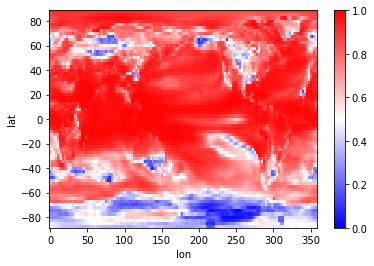

In [48]:
frac.sel(time=slice('2050', '2059')).mean('time').plot(vmin=0, vmax=1, cmap='bwr')

In [67]:
mmle.compute_FIT()

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


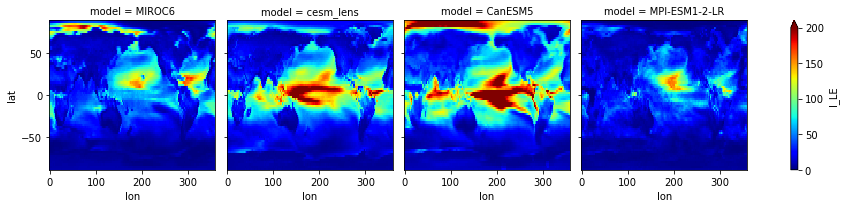

In [69]:
np.sqrt(mmle.results['I_LE']).sel(time=slice('2050', '2059')).mean('time').plot(col='model', vmax=200, cmap='jet')

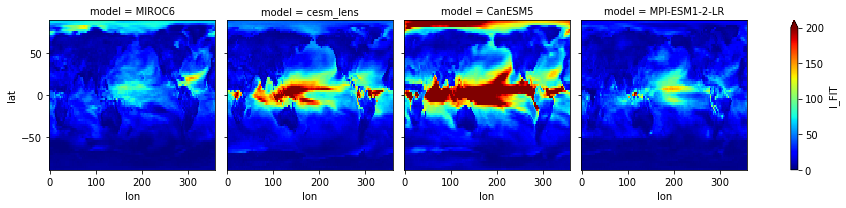

In [70]:
np.sqrt(mmle.results['I_FIT']).plot(col='model', vmax=200, cmap='jet')

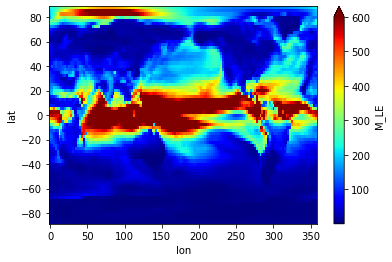

In [74]:
np.sqrt(mmle.results['M_LE']).sel(time=slice('2050', '2059')).mean('time').plot(vmax=600, cmap='jet')

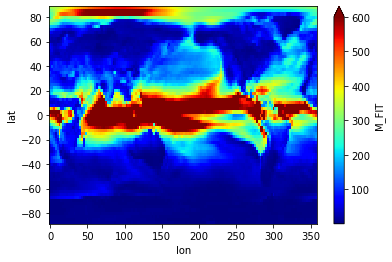

In [75]:
np.sqrt(mmle.results['M_FIT']).sel(time=slice('2050', '2059')).mean('time').plot(vmax=600, cmap='jet')

## CMIP

In [148]:
xr.open_zarr('gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp585/day/pr.zarr')

,Array,Chunk
Bytes,4.73 GiB,5.92 MiB
Shape,"(2, 1, 31046, 71, 144)","(1, 1, 31046, 5, 5)"
Count,871 Tasks,870 Chunks
Type,float64,numpy.ndarray


In [151]:
mmle = MultiModelLargeEnsemble('cmip6', 'pr', 'day', 
                               lat=50, lon=10, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp585/day/pr.zarr


In [136]:
mmle.compute_x(x_type='quantile_return')

  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


8.77109146118164


  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


8.769718170166016


  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


8.67263412475586


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


8.796646118164062


  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


8.792858123779297


  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


8.843666076660156


100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


8.893852233886719


100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


8.909076690673828


100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


8.908771514892578


100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


8.749980926513672


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


8.748424530029297


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


8.796974182128906


  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


8.79703140258789


  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

8.795394897460938


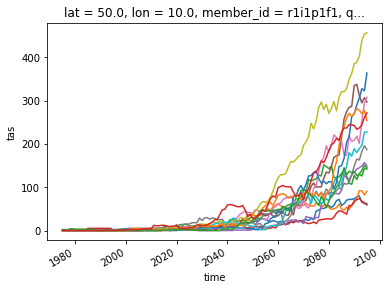

In [139]:
mmle.x.plot(hue='model', add_legend=False);

In [141]:
mmle.compute_FIT()

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [142]:
mmle.results

<xarray.Dataset>
Dimensions:    (model: 14, lat: 1, lon: 1, time: 130)
Coordinates:
  * model      (model) <U30 'INM-CM4-8' 'INM-CM5-0' ... 'GFDL-ESM4' 'NorESM2-MM'
  * lat        (lat) float64 50.0
  * lon        (lon) float64 10.0
  * time       (time) datetime64[ns] 1970-01-01 1971-01-01 ... 2099-01-01
    member_id  <U8 'r1i1p1f1'
    quantile   float64 0.9997
    q_values   (model, lat, lon) float64 307.3 305.9 307.9 ... 296.8 297.1 300.8
Data variables:
    FIT        (time, model, lat, lon) float64 0.2374 3.388 ... 155.1 324.9
    M_FIT      (time, lat, lon) float64 192.9 144.2 ... 1.661e+04 1.812e+04
    I_FIT      (model, lat, lon) float64 30.74 53.36 126.4 ... 334.6 86.37 175.8
    Ibar_FIT   (lat, lon) float64 146.2
    T_FIT      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan